In [1]:
import pandas as pd
pd.set_option("display.max_columns", 150)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import os
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy
from collections import Counter

from cellacdc import cca_functions
from cellacdc import myutils

data_dir = os.path.join('..', 'data', 'paper_plot_data')

In [2]:
%load_ext autoreload
%autoreload 2

# Figure 3

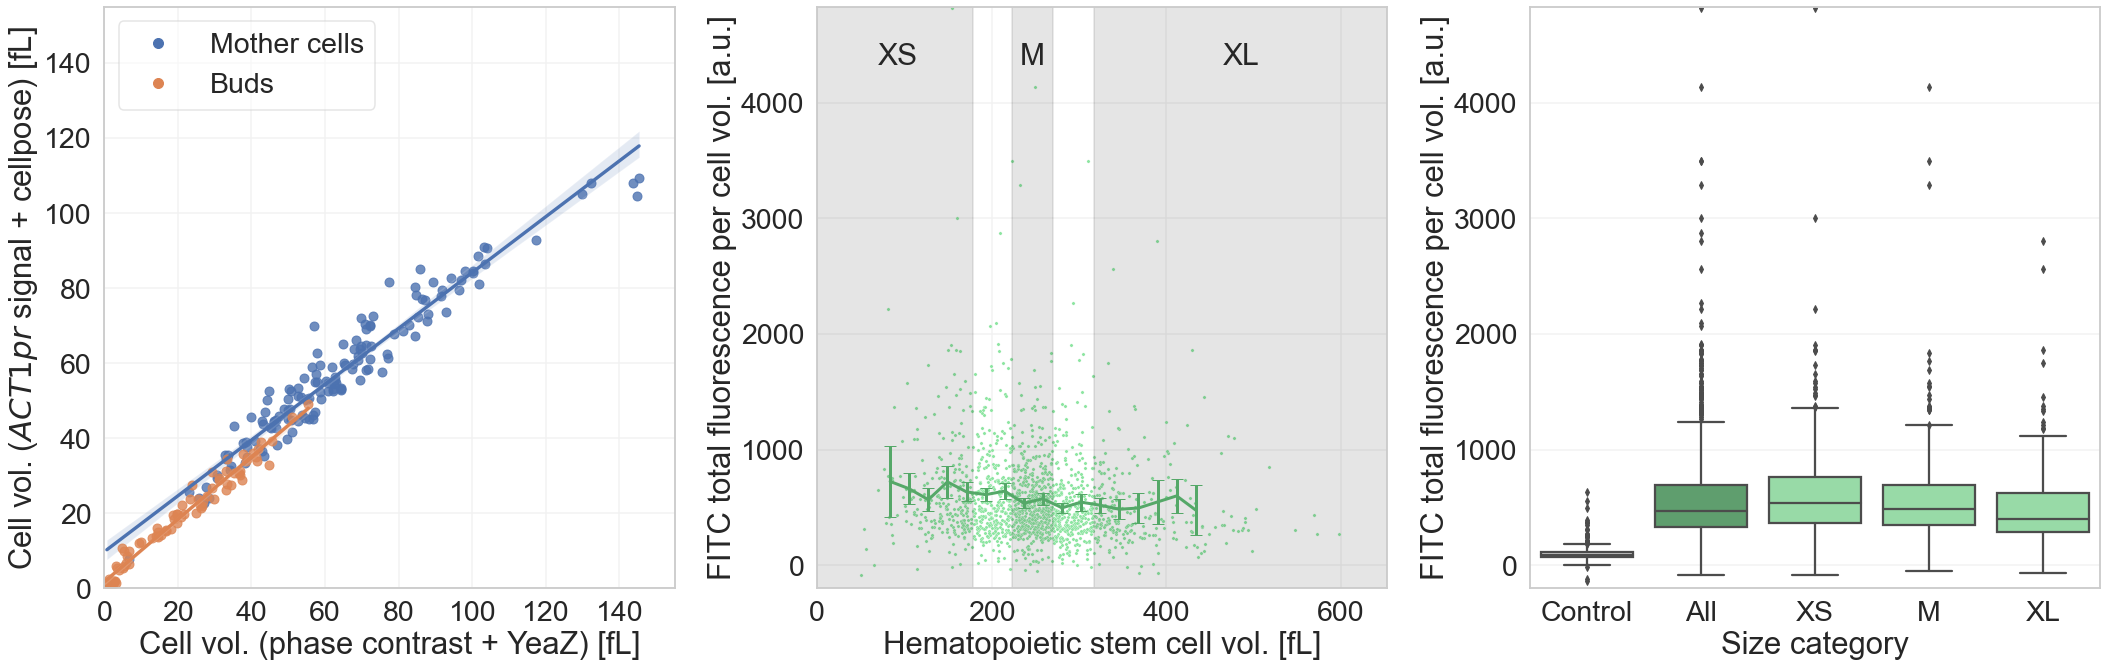

Sample size Fig. 3A: 113
Pearson Correlation and p-value for non-correlation 3A: (0.9831399934935635, 2.788007573955024e-167)
Sample size Fig. 3B&3C: 1634
Sample size control Fig. 3C: 417
ommitted 0 cells with FITC concentration higher than 4830.422634201878
Effect size (cohen) All vs. Control: 1.3
Effect size (cohen) XS vs. Control: 1.8
Effect size (cohen) M vs. Control: 1.62
Effect size (cohen) XL vs. Control: 1.74
Effect size (glass) All vs. Control: 6.85
Effect size (glass) XS vs. Control: 8.07
Effect size (glass) M vs. Control: 6.75
Effect size (glass) XL vs. Control: 5.88


In [3]:
# load data from csv
plot_data3a = pd.read_csv(os.path.join(data_dir, 'plot_data3a.csv'))
plot_data3b = pd.read_csv(os.path.join(data_dir, 'plot_data3b.csv'))
plot_data3c = pd.read_csv(os.path.join(data_dir, 'plot_data3c_violin.csv'))

sns.set_theme(context='talk', font_scale=1.725)
sns.set_style("whitegrid", {"grid.color": ".95"})
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
# subplot 1
sns.regplot(
    data=plot_data3a[plot_data3a.relationship_cellpose=='mother'],
    x='cell_vol_fl_yeaz',
    y='cell_vol_fl_cellpose',
    ax = axs[0],
    color = sns.color_palette()[0]
)
sns.regplot(
    data=plot_data3a[plot_data3a.relationship_cellpose=='bud'],
    x='cell_vol_fl_yeaz',
    y='cell_vol_fl_cellpose',
    ax = axs[0],
    color = sns.color_palette()[1]
)
labels = [
    'Mother cells',
    'Buds'
]
handles = [
    mlines.Line2D([], [], color=sns.color_palette()[0], marker='o', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color=sns.color_palette()[1], marker='o', linestyle='None',
                          markersize=10)
]
axs[0].legend(
    handles=handles,
    labels=labels, 
    loc='upper left',
    framealpha=0.5
)
scatter_plot_max = max(plot_data3a.cell_vol_fl_yeaz.max(), plot_data3a.cell_vol_fl_cellpose.max())
axs[0].set_xlabel('Cell vol. (phase contrast + YeaZ) [fL]')
axs[0].set_ylabel('Cell vol. ($\it{ACT1pr}$ signal + cellpose) [fL]')
#axs[0].set_title('A', fontsize=50, loc='left', pad=30, x=-0.175)
axs[0].set_ylim(0, int(scatter_plot_max)+10)
axs[0].set_xlim(0, int(scatter_plot_max)+10)
axs[0].set_xticks(np.arange(0, scatter_plot_max+10, 20))
axs[0].set_yticks(np.arange(0, scatter_plot_max+10, 20))
# subplot 2
sns.scatterplot(
    data=plot_data3b,
    x='cell_vol_fl',
    y='FITC_concentration',
    ax = axs[1],
    color=sns.color_palette('pastel')[2],
    s=11,
    legend=False
    #scatter_kws={'s':10},
    #x_bins=20
    #hue='size_category'
)
nbins = 25
bins_min_count = 10
xe, ye, std = cca_functions.binned_mean_stats(plot_data3b.cell_vol_fl, plot_data3b.FITC_concentration, nbins, bins_min_count)
axs[1].errorbar(xe, ye, yerr=std, capsize=6, lw=3, c=sns.color_palette()[2])
axs[1].set_xlabel('Hematopoietic stem cell vol. [fL]')
axs[1].set_ylabel('FITC total fluorescence per cell vol. [a.u.]')
#lower_y_border, upper_y_border = plot_data3b.FITC_concentration.min()-10, plot_data3b.FITC_concentration.max()+10
lower_y_border, upper_y_border = -200, plot_data3c.FITC_concentration.max()+10
height = upper_y_border - lower_y_border
# configure borders for "size blocks"
xs_borders = 0, np.percentile(plot_data3b.cell_vol_fl, 15)
m_borders = np.percentile(plot_data3b.cell_vol_fl, 35), np.percentile(plot_data3b.cell_vol_fl, 65)
xl_borders = np.percentile(plot_data3b.cell_vol_fl, 85), np.percentile(plot_data3b.cell_vol_fl, 85)*2 + 20
xs_width = xs_borders[1]-xs_borders[0]
m_width = m_borders[1]-m_borders[0]
xl_width = xl_borders[1]-xl_borders[0]
# add gray rectangles for size categories
axs[1].add_patch(
    patches.Rectangle((xs_borders[0], lower_y_border), xs_width, height, color='black', alpha=0.1)
)
axs[1].text(0.5*sum(xs_borders)-20, upper_y_border-500, 'XS', fontdict={'fontsize':30})
axs[1].add_patch(
    patches.Rectangle((m_borders[0], lower_y_border), m_width, height, color='black', alpha=0.1)
)
axs[1].text(0.5*sum(m_borders)-15, upper_y_border-500, 'M', fontdict={'fontsize':30})
axs[1].add_patch(
    patches.Rectangle((xl_borders[0], lower_y_border), xl_width, height, color='black', alpha=0.1)
)
axs[1].text(0.5*sum(xl_borders)-20, upper_y_border-500, 'XL', fontdict={'fontsize':30})
# set x and y limits manually
axs[1].set_xlim(0, xl_borders[1])
axs[1].set_ylim(lower_y_border, upper_y_border)
#axs[1].set_title('B', fontsize=40, loc='left', pad=10)
#axs[1].set_yscale('log')

# subplot 3
sns.boxplot(
    data=plot_data3c,
    x='size_category',
    y='FITC_concentration',
    order=["Control", "All", "XS", "M", "XL"],
    palette=['lightgray', sns.color_palette()[2]]+ [sns.color_palette('pastel')[2]]*3,
    ax=axs[2],
    #size=1
    #inner='quartile'
)
axs[2].set_xlabel('Size category')
axs[2].set_ylabel('FITC total fluorescence per cell vol. [a.u.]')
#axs[2].set_title('C', fontsize=40, loc='left', pad=10)
axs[2].set_ylim(lower_y_border, upper_y_border)
#axs[2].set_yscale('log')

plt.tight_layout()
"""
plt.savefig(
    '../figures/figure3_final.svg',
    dpi=300
)
"""
plt.show()

print(f'Sample size Fig. 3A: {len(plot_data3a)//2}')
pearson_r, p_value = scipy.stats.pearsonr(plot_data3a.cell_vol_fl_yeaz, plot_data3a.cell_vol_fl_cellpose)
print(f'Pearson Correlation and p-value for non-correlation 3A: {pearson_r, p_value}')
print(f'Sample size Fig. 3B&3C: {len(plot_data3b)}')
print(f'Sample size control Fig. 3C: {len(plot_data3c[plot_data3c.size_category=="Control"])}')

print(
    f'ommitted {len(plot_data3b[plot_data3b.FITC_concentration>upper_y_border])} cells with FITC concentration '
    f'higher than {upper_y_border}'
     )

print(f'Effect size (cohen) All vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data3c, "All", "Control"), 2)}')
print(f'Effect size (cohen) XS vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data3c, "XS", "Control"), 2)}')
print(f'Effect size (cohen) M vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data3c, "M", "Control"), 2)}')
print(f'Effect size (cohen) XL vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data3c, "XL", "Control"), 2)}')

print(f'Effect size (glass) All vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data3c, "All", "Control"), 2)}')
print(f'Effect size (glass) XS vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data3c, "XS", "Control"), 2)}')
print(f'Effect size (glass) M vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data3c, "M", "Control"), 2)}')
print(f'Effect size (glass) XL vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data3c, "XL", "Control"), 2)}')

# Figure 4

['Af control, sc at birth' 'Af control, m+b at cytokinesis'
 'Single cell at birth' 'Mother+bud at cytokinesis']


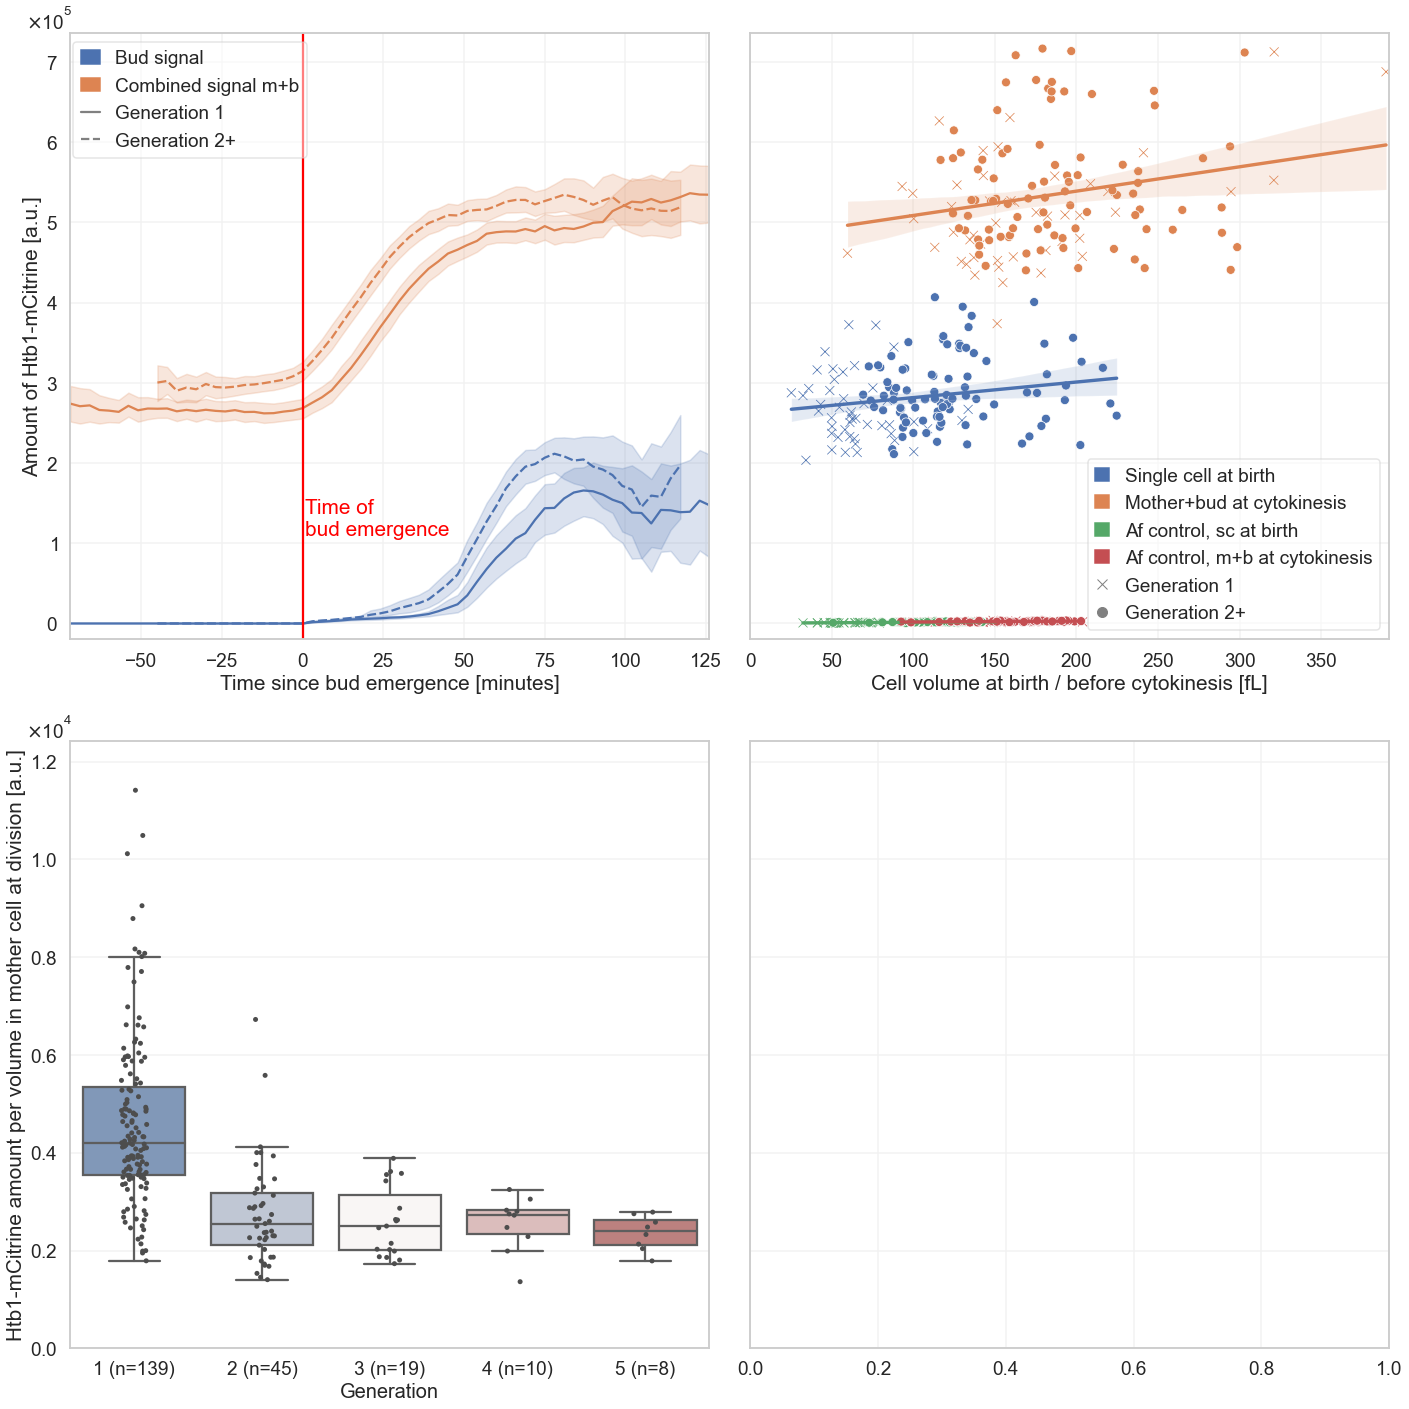

Fig 4A sample size: 137
Fig 4A sample sizes by generation: ['1st ($n_1$=48)' '2+ ($n_2$=89)']
Fig 4B sample size: 215
Fig 4B sample size flu-control: 78
Fig 4B sample size tagged strain: 137
Fig 4C sample size: 221


In [4]:
plot_data4a = pd.read_csv(os.path.join(data_dir, 'plot_data4a_v2.csv'))
plot_data4a_melted = pd.read_csv(os.path.join(data_dir, 'plot_data4a_melted_v2.csv'))
plot_data4b = pd.read_csv(os.path.join(data_dir, 'plot_data4b_v2.csv'))
plot_data4c = pd.read_csv(os.path.join(data_dir, 'plot_data4c.csv'))
sns.set_theme(context='talk', font_scale=1.15)
sns.set_style("whitegrid", {"grid.color": ".95"})
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20), sharey='row')

shared_y_max = plot_data4b.relevant_amount.max()+0.2e5
split_by_gen = True

# subplot 1
if split_by_gen:
    style='Generation'
else:
    style=None
sns.lineplot(
    data=plot_data4a_melted,#.sort_values('Pool, Phase'),
    x="centered_time_in_minutes", 
    y="value",
    hue='Method of calculation',
    style=style,
    ci=95,
    ax=axs[0,0],
    legend=False
)
axs[0,0].axvline(x=0, color='red')#, label='Time of Bud Emergence')
axs[0,0].text(
    0.7, 1.1e5, "Time of \nbud emergence", horizontalalignment='left', 
    size='medium', color='red', weight='normal'
)
# custom legend
labels = [
    'Bud signal',
    'Combined signal m+b',
    'Generation 1',
    'Generation 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette()[0]),
    mpatches.Patch(color=sns.color_palette()[1]),
    mlines.Line2D([], [], color='gray', linestyle='-'),
    mlines.Line2D([], [], color='gray', linestyle='--')
]
axs[0,0].legend(
    handles=handles,
    labels=labels, 
    loc='upper left',
    bbox_to_anchor = (-.01,1),
    framealpha=0.5,
    handlelength=1
)
#plt.setp(axs[0,0].get_legend().get_title(), fontsize='20') 
axs[0,0].set_ylabel("Amount of Htb1-mCitrine [a.u.]")
axs[0,0].set_xlabel("Time since bud emergence [minutes]")
#axs[0,0].set_title('A', fontsize=30, loc='left', pad=10)
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[0,0].get_yaxis().get_offset_text().set_position((-0.07, 0))
axs[0,0].set_ylim(-0.2e5, shared_y_max)
axs[0,0].set_xlim(
    plot_data4a_melted.centered_time_in_minutes.min(),
    plot_data4a_melted.centered_time_in_minutes.max()
)
#axs[0,0].legend().get_texts()[0].set_text(matplotlib.text.Text(text='test', fontweight=1000))

#subplot 2
# Initialize the figure
sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b[plot_data4b.generation_num==1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    marker='x',
    ax=axs[0,1]
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b[plot_data4b.generation_num>1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='o',
    ax=axs[0,1]
)
measurements = [
    'Single cell at birth',
    'Mother+bud at cytokinesis',
    'Af control, sc at birth',
    'Af control, m+b at cytokinesis'
]
# add regplots in for loop
print(pd.unique(plot_data4b['Kind of Measurement new']))
for idx, measure in enumerate(measurements):
    sns.regplot(
        x="relevant_volume", 
        y="relevant_amount", 
        data=plot_data4b[plot_data4b['Kind of Measurement new']==measure],
        color=sns.color_palette()[idx],
        scatter=False,
        ax=axs[0,1]
    )
labels = [
    'Generation 1',
    'Generation 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette()[0]),
    mpatches.Patch(color=sns.color_palette()[1]),
    mpatches.Patch(color=sns.color_palette()[2]),
    mpatches.Patch(color=sns.color_palette()[3]),
    mlines.Line2D([], [], color='gray', marker='x', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                          markersize=10)
]
axs[0,1].legend(
    handles=handles,
    labels=measurements+labels, 
    loc='lower right',
    #bbox_to_anchor = (1,0),
    framealpha=0.5,
    handlelength=0.75
)
axs[0,1].set_ylabel("Amount of Htb1-mCitrine [a.u.]")
axs[0,1].set_xlabel('Cell volume at birth / before cytokinesis [fL]')
# format y-axis
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[0,1].get_yaxis().get_offset_text().set_position((-0.07, 0))
# format x-axis
axs[0,1].set_xlim(0, plot_data4b.relevant_volume.max()+2)
axs[0,1].set_ylim(-0.2e5, shared_y_max)
#axs[0,1].set_title('B', fontsize=30, loc='left', pad=10)

sns.boxplot(
    data=plot_data4c,
    x='x_label',
    y='mCitrine_corrected_concentration',
    palette='vlag',
    fliersize=0,
    ax=axs[1,0]
)

#add stripplot on top
sns.stripplot(
    data=plot_data4c,
    x='x_label',
    y='mCitrine_corrected_concentration',
    color=".3",
    ax=axs[1,0]
)

# switch to scientific number format on y-Axis and move text
axs[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[1,0].get_yaxis().get_offset_text().set_position((-0.07,0))

# Rename axes and set title
axs[1,0].set_ylabel("Htb1-mCitrine amount per volume in mother cell at division [a.u.]")#, fontsize=20)
axs[1,0].set_xlabel("Generation", fontsize=20)
#axs[1,0].set_title(f"Concentration by Generation (n={len(plot_data4c)})", fontsize=25) # changed this from 30 to 25 compared to 4B
axs[1,0].set_ylim(0, plot_data4c.mCitrine_corrected_concentration.max()+0.1e4)

plt.tight_layout()
#plt.savefig(os.path.join('..', 'figures', 'combined_fig4.png'), dpi=300)
#plt.savefig(os.path.join('..', 'figures', 'combined_fig4.svg'))
plt.show()
sample_size4a = len(plot_data4a[['position', 'Cell_ID', 'file', 'generation_num']].drop_duplicates())
sample_size4b = len(plot_data4b)
print(f'Fig 4A sample size: {sample_size4a}')
print(f'Fig 4A sample sizes by generation: {plot_data4a_melted.Generation.unique()}')
print(f"Fig 4B sample size: {int(sample_size4b/2)}")
print(f'Fig 4B sample size flu-control: {len(plot_data4b[plot_data4b.selection_subset==1])//2}')
print(f'Fig 4B sample size tagged strain: {len(plot_data4b[plot_data4b.selection_subset==0])//2}')
print(f'Fig 4C sample size: {len(plot_data4c)}')

# Load raw data to create Figure 3

## configuration

In [5]:
stem_data = pd.read_csv(os.path.join(data_dir, 'stemcell_data.csv'))
# configure borders for "size blocks"
xs_borders = 0, np.percentile(stem_data.cell_vol_fl, 15)
m_borders = np.percentile(stem_data.cell_vol_fl, 35), np.percentile(stem_data.cell_vol_fl, 65)
xl_borders = np.percentile(stem_data.cell_vol_fl, 85), np.percentile(stem_data.cell_vol_fl, 85)*2 + 20
# In Fig. 3B very small cells are assumed to be imaging fragments, very large cells missed Segmentation errors
min_vol, max_vol = 50, xl_borders[0]*2
stem_selection_indices = np.logical_and(stem_data.cell_vol_fl>min_vol, stem_data.cell_vol_fl<max_vol)
stem_data = stem_data[stem_selection_indices]
stem_data['FITC_concentration'] = stem_data['FITC_amount_autoBkgr_zSlice'] / stem_data['cell_vol_fl']

## generate Act1-cellpose vs. PC-YeaZ Volume plot

In [6]:
phase_contr_yeaz_data = pd.read_csv(os.path.join(data_dir, 'SegmPhaseContr_YeaZ_AllPos_acdc_output.csv'))
cellpose_act1_data = pd.read_csv(os.path.join(data_dir, 'SegmACT1_Cellpose_AllPos_acdc_output.csv'))
merged_vol_data = pd.merge(
    phase_contr_yeaz_data,
    cellpose_act1_data,
    on=['Position_n', 'Cell_ID'],
    suffixes=('_yeaz', '_cellpose')
)

<Figure size 720x720 with 0 Axes>

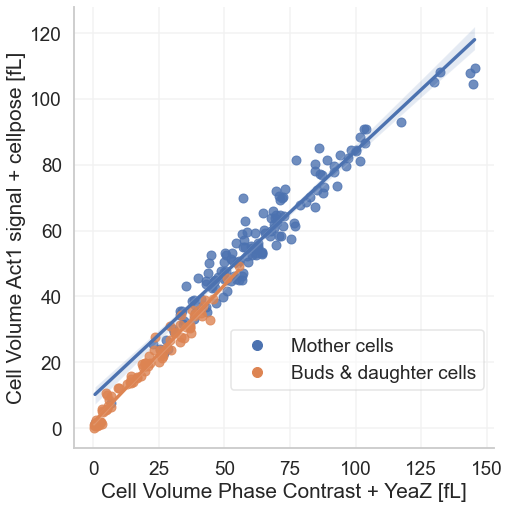

In [7]:
plt.figure(figsize=(10,10))
fig = sns.lmplot(
    data=merged_vol_data,
    x='cell_vol_fl_yeaz',
    y='cell_vol_fl_cellpose',
    hue='relationship_cellpose',
    height=7.5,
    legend=False
)
ax = plt.gca()
labels = [
    'Mother cells',
    'Buds & daughter cells'
]
handles = [
    mlines.Line2D([], [], color=sns.color_palette()[0], marker='o', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color=sns.color_palette()[1], marker='o', linestyle='None',
                          markersize=10)
]
ax.legend(
    handles=handles,
    labels=labels, 
    loc='center right',
    bbox_to_anchor = (1,0.2),
    framealpha=0.5
)
ax.set_xlabel('Cell Volume Phase Contrast + YeaZ [fL]')
ax.set_ylabel('Cell Volume Act1 signal + cellpose [fL]')
plt.show()
#merged_vol_data.to_csv(os.path.join(data_dir, 'plot_data3a.csv'), index=False)

## generate scatter plot with "size blocks"

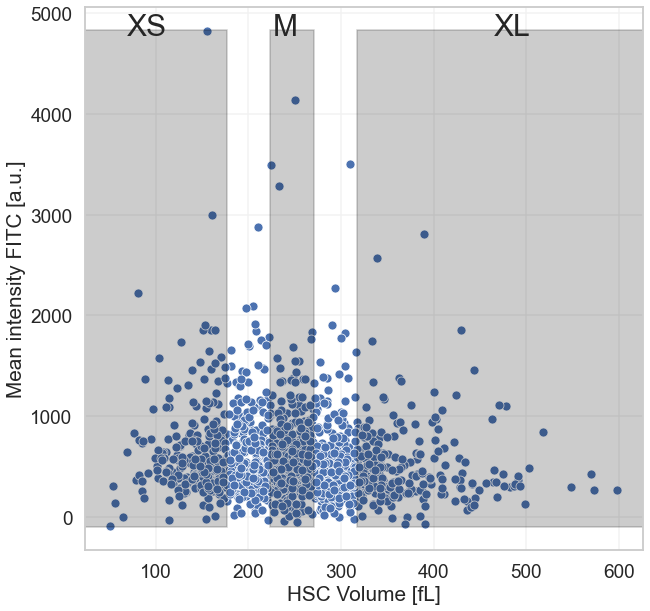

In [8]:
plt.subplots(figsize=(10,10))
sns.set_theme(context='talk', style='darkgrid')
ax = sns.scatterplot(
    data=stem_data,
    x='cell_vol_fl',
    y='FITC_concentration',
    #hue='size_category'
)
ax.set_xlabel('HSC Volume [fL]')
ax.set_ylabel('Mean intensity FITC [a.u.]')
lower_y_border, upper_y_border = stem_data.FITC_concentration.min()-10, stem_data.FITC_concentration.max()+10
height = upper_y_border - lower_y_border
xs_width = xs_borders[1]-xs_borders[0]
m_width = m_borders[1]-m_borders[0]
xl_width = xl_borders[1]-xl_borders[0]
ax.add_patch(
    patches.Rectangle((xs_borders[0], lower_y_border), xs_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(xs_borders)-20, upper_y_border-50, 'XS', fontdict={'fontsize':30})
ax.add_patch(
    patches.Rectangle((m_borders[0], lower_y_border), m_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(m_borders)-20, upper_y_border-50, 'M', fontdict={'fontsize':30})
ax.add_patch(
    patches.Rectangle((xl_borders[0], lower_y_border), xl_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(xl_borders)-20, upper_y_border-50, 'XL', fontdict={'fontsize':30})
"""
plt.savefig(
    '../figures/stemcell_scatter_v1.pdf',
    dpi=300
)
"""
plt.show()
#stem_data.to_csv(os.path.join(data_dir, 'plot_data3b.csv'), index=False)

## generate violin plots by size category (ended up as boxplots in Fig 3)

In [9]:
stem_bkgr_data = pd.read_csv(os.path.join(data_dir, 'stemcell_bkgr_data.csv'))
stem_bkgr_data['FITC_concentration'] = stem_bkgr_data['FITC_amount_autoBkgr_zSlice'] / stem_bkgr_data['cell_vol_fl']
def generate_size_str(x):
    if x>=0 and x<=xs_borders[1]:
        return 'XS'
    elif x>=m_borders[0] and x<=m_borders[1]:
        return 'M'
    elif x>=xl_borders[0]:
        return 'XL'
    else:
        return 'rest'
all_data = stem_data.copy()
all_data['size_category'] = 'All'
stem_data['size_category'] = stem_data.cell_vol_fl.apply(generate_size_str)
stem_bkgr_data['size_category'] = 'Control'
violin_data = pd.concat([all_data, stem_data[stem_data.size_category!='rest'], stem_bkgr_data], ignore_index=True)

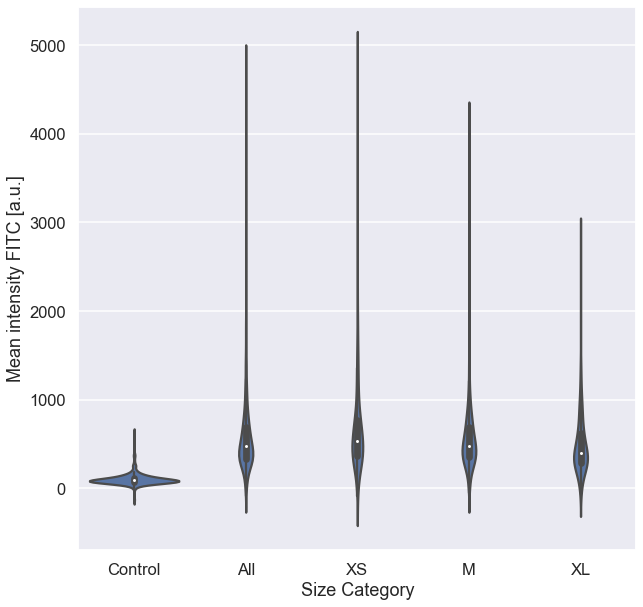

In [10]:
sns.set_theme(context='talk', style='darkgrid')
plt.figure(figsize=(10,10))
ax = sns.violinplot(
    data=violin_data,
    x='size_category',
    y='FITC_concentration',
    order=["Control", "All", "XS", "M", "XL"],
    color=sns.color_palette()[0]
    #inner='quartile'
)
ax.set_xlabel('Size Category')
ax.set_ylabel('Mean intensity FITC [a.u.]')
"""
plt.savefig(
    '../figures/stemcell_violin_v1.pdf',
    dpi=300
)
"""
plt.show()
#violin_data.to_csv(os.path.join(data_dir, 'plot_data3c_violin.csv'), index=False)

# Load raw data to perform calculations for Figure 4
(same as in downstream-notebook but with fixed data selection)

## calculate downstream data based on raw image data

In [11]:
data_dirs, positions = (
    [
        '../data/acdc_test_data/TimeLapse_2D/MIA_KC_htb1_mCitrine_labeled',
        '../data/acdc_test_data/TimeLapse_2D/MIA_KC_htb1_mCitrine_flu_control_labeled'
    ],
    [
        ['Position_2', 'Position_3', 'Position_4', 'Position_5', 'Position_8'],
        ['Position_1', 'Position_3']
    ]
)
file_names = [os.path.split(path)[-1] for path in data_dirs]
image_folders = [[os.path.join(data_dir, pos_str, 'Images') for pos_str in pos_list] for pos_list, data_dir in zip(positions, data_dirs)]
# determine available channels based on first(!) position.
# Warn user if one or more of the channels are not available for some positions
first_pos_dir = os.path.join(data_dirs[0], positions[0][0], 'Images')
first_pos_files = myutils.listdir(first_pos_dir)
channels, warn = cca_functions.find_available_channels(first_pos_files, first_pos_dir)

In [12]:
overall_df, is_timelapse_data, is_zstack_data = cca_functions.calculate_downstream_data(
    file_names,
    image_folders,
    positions,
    channels, 
    force_recalculation=False
)
#overall_df.to_csv(os.path.join(data_dir, 'raw_downstream_data_fig4_v2.csv'), index=False)

Load files for MIA_KC_htb1_mCitrine_labeled, Position_2...
Number of cells in position: 18
Number of annotated frames in position: 241
Cell Cycle property data already existing, loaded from disk...
Load files for MIA_KC_htb1_mCitrine_labeled, Position_3...
Number of cells in position: 28
Number of annotated frames in position: 241
Cell Cycle property data already existing, loaded from disk...
Load files for MIA_KC_htb1_mCitrine_labeled, Position_4...
Number of cells in position: 54
Number of annotated frames in position: 241
Cell Cycle property data already existing, loaded from disk...
Load files for MIA_KC_htb1_mCitrine_labeled, Position_5...
Number of cells in position: 64
Number of annotated frames in position: 241
Cell Cycle property data already existing, loaded from disk...
Load files for MIA_KC_htb1_mCitrine_labeled, Position_8...
Number of cells in position: 51
Number of annotated frames in position: 241
Cell Cycle property data already existing, loaded from disk...
Load files

## Alternatively load raw downstream data

In [13]:
data_dir = os.path.join('..', 'data', 'paper_plot_data')
overall_df = pd.read_csv(os.path.join(data_dir, 'raw_downstream_data_fig4_v2.csv'))

C:\Users\mairhoermann\AppData\Local\Temp\ipykernel_18696\531543764.py:2: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  overall_df = pd.read_csv(os.path.join(data_dir, 'raw_downstream_data_fig4_v2.csv'))


## Perform calculations generally needed for Figure 4

In [14]:
overall_df_with_rel = cca_functions.calculate_relatives_data(overall_df, channels)
# If working with timelapse data build dataframe grouped by phases
group_cols = [
    'Cell_ID', 'generation_num', 'cell_cycle_stage', 'relationship', 'position', 'file', 
    'max_frame_pos', 'selection_subset', 'max_t'
]
# calculate data grouped by phase only in the case, that timelapse data is available
if is_timelapse_data:
    phase_grouped = cca_functions.calculate_per_phase_quantities(overall_df_with_rel, group_cols, channels)
    # append phase-grouped data to overall_df
    overall_df_with_rel = overall_df_with_rel.merge(
        phase_grouped,
        how='left',
        on=group_cols
    )
    phase_grouped.head()

In [15]:
overall_df_with_rel.shape, phase_grouped.shape

((21509, 367), (1050, 35))

## perform calculations for time plot (Fig. 4A)

In [16]:
# some configurations
# frame interval of video
frame_interval_minutes = 3
# quantiles of complete cell cycles (wrt phase lengths) to exclude from analysis 
# (not used, keep this for potential later use)
down_q, upper_q = 0, 1
# minimum number of cell cycles contributing to the mean+CI curve:
min_no_of_ccs = 10
# determine if you want to split the plot by generation
split_by_gen = True
# wether to scale to 0/1 or not
scale_data = False

# select needed cols from overall_df_with_rel to not end up with too many columns
needed_cols = [
    'selection_subset', 'position', 'Cell_ID', 'cell_cycle_stage', 'generation_num', 'frame_i',
    'mCitrine_corrected_amount', 'mCitrine_corrected_amount_rel', 
    'file', 'relationship', 'relative_ID', 'phase_length', 'phase_begin', 'gui_mCitrine_amount_autoBkgr'
]
filter_idx = np.logical_and(overall_df_with_rel['complete_cycle'] == 1, overall_df_with_rel.selection_subset==0)
plot_data4a = overall_df_with_rel.loc[filter_idx, needed_cols].copy()
# calculate the time the cell already spent in the current frame at the current timepoint
plot_data4a['frames_in_phase'] = plot_data4a['frame_i'] - plot_data4a['phase_begin'] + 1
# calculate the time to the next (for G1 cells) and from the last (for S cells) G1/S transition  
plot_data4a['centered_frames_in_phase'] = plot_data4a.apply(
    lambda x: x.loc['frames_in_phase'] if\
    x.loc['cell_cycle_stage']=='S' else\
    x.loc['frames_in_phase']-1-x.loc['phase_length'],
    axis=1
)
# calculate combined signal and the "Pool, Phase ID" for the legend
# plot_data4a at this point only contains relationship==mother, 
# as generation_num==0 and relationship==bud are filtered out (incomplete cycle, cycles start with G1)
plot_data4a['Combined signal m&b'] = plot_data4a.apply(
    lambda x: x.loc['mCitrine_corrected_amount']+x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else\
    x.loc['mCitrine_corrected_amount'],
    axis=1
)
plot_data4a['Bud signal'] = plot_data4a.apply(
    lambda x: x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else 0,
    axis=1
)
# scale data if needed
if scale_data:
    maximum = max(
        plot_data4a['Combined signal m&b'].max(), 
        plot_data4a['Bud signal'].max()
    )
    plot_data4a['Combined signal m&b'] /= maximum
    plot_data4a['Bud signal'] /= maximum
# calculate min and max centered times per generation to eliminate up to a percentile
# (not used, as upper_q and lower_q are set to 100/0 respectively)
plot_data4a['min_centered_frames'] = plot_data4a.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
)['centered_frames_in_phase'].transform(
    'min'
)
plot_data4a['max_centered_frames'] = plot_data4a.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
)['centered_frames_in_phase'].transform(
    'max'
)
min_and_max = plot_data4a.groupby(
    ['Cell_ID', 'generation_num', 'position', 'file']
).agg(
    min_centered = ('min_centered_frames', 'first'),
    max_centered = ('max_centered_frames', 'first')
).reset_index()
min_val, max_val = np.quantile(
    min_and_max.min_centered, down_q
) * frame_interval_minutes, np.quantile(
    min_and_max.max_centered, upper_q
) * frame_interval_minutes
# perform selection (won't change anything if upper and lower are 100 and 0 respectively)
selection_indices = np.logical_and(
    plot_data4a.min_centered_frames*frame_interval_minutes>=min_val, 
    plot_data4a.max_centered_frames*frame_interval_minutes<=max_val
)
plot_data4a = plot_data4a[selection_indices]

# calculate centered time in minutes
plot_data4a['centered_time_in_minutes'] = plot_data4a.centered_frames_in_phase * frame_interval_minutes

# group dataframe to calculate sample sizes per generation
standard_grouped = plot_data4a.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
).agg('count').reset_index()
plot_data4a['Generation'] = plot_data4a.apply(
    lambda x: f'1st ($n_1$={len(standard_grouped[standard_grouped.generation_num==1])})' if\
    x.loc['generation_num']==1 else f'2+ ($n_2$={len(standard_grouped[standard_grouped.generation_num>1])})',
    axis=1
)
if split_by_gen:
    g_cols = ['centered_frames_in_phase', 'Generation']
else:
    g_cols = 'centered_frames_in_phase'
plot_data4a['contributing_ccs_at_time'] = plot_data4a.groupby(g_cols).transform('count')['selection_subset']
plot_data4a = plot_data4a[plot_data4a.contributing_ccs_at_time >= min_no_of_ccs]

# finally prepare data for plot (use melt for multiple lines)
sample_size_4a = len(standard_grouped)
avg_cell_cycle_length = round(standard_grouped.loc[:,'centered_time_in_minutes'].mean())*frame_interval_minutes
cols_to_plot = ['Bud signal', 'Combined signal m&b']
index_cols = [col for col in plot_data4a.columns if col not in cols_to_plot]
plot_data4a_melted = pd.melt(
    plot_data4a, index_cols, var_name='Method of calculation'
).sort_values('Method of calculation')
data_dir = os.path.join('..', 'data', 'paper_plot_data')
# save preprocessed data for Fig. 4A
#plot_data4a_melted.to_csv(os.path.join(data_dir, 'plot_data4a_melted_v2.csv'), index=False)
#plot_data4a.to_csv(os.path.join(data_dir, 'plot_data4a_v2.csv'), index=False)

## generate time plot (Fig. 4A)

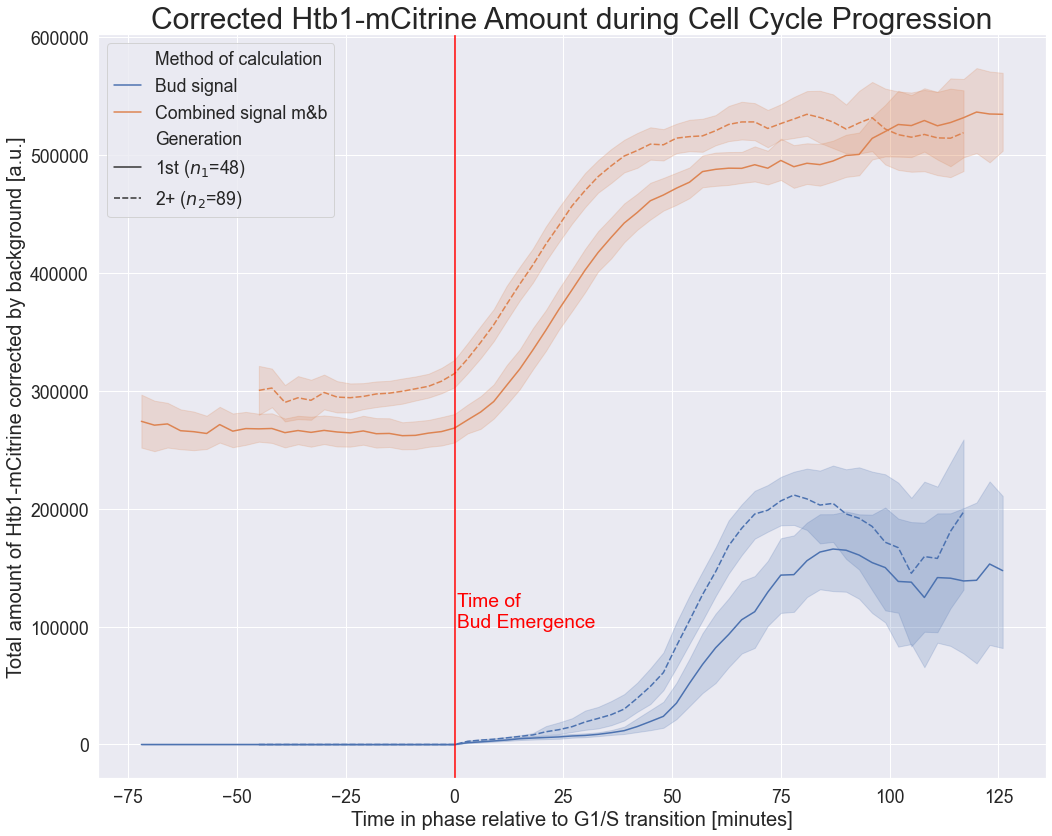

In [17]:
# plot the data, comment out "style" argument to not make difference between generations
sns.set_theme(style="darkgrid", font_scale=1.6)
f, ax = plt.subplots(figsize=(15, 12))
if split_by_gen:
    style='Generation'
else:
    style=None
ax = sns.lineplot(
    data=plot_data4a_melted,#.sort_values('Pool, Phase'),
    x="centered_time_in_minutes", 
    y="value",
    hue='Method of calculation',
    style=style,
    #style='position',
    ci=95
)
ax.axvline(x=0, color='red')#, label='Time of Bud Emergence')
ax.text(
    0.5, 100000, "Time of \nBud Emergence", horizontalalignment='left', 
    size='medium', color='red', weight='normal'
)
ax.legend(
    #title=f'Avg CC Length: {avg_cell_cycle_length} min, n = {sample_size_4a}', 
    fancybox=True,
    labelspacing=0.5,
    handlelength=1.5,
    loc = 'upper left'
)
ax.set_ylabel("Total amount of Htb1-mCitrine corrected by background [a.u.]", fontsize=20)
ax.set_xlabel("Time in phase relative to G1/S transition [minutes]", fontsize=20)
ax.set_title("Corrected Htb1-mCitrine Amount during Cell Cycle Progression", fontsize=30)
plt.tight_layout()
"""
plt.savefig(
    os.path.join('..', 'figures', 'mCitrine_over_time_by_gen_v4.pdf'),
    dpi=300
)
"""
plt.show()

## perform calculations for volume at birth plot (Fig 4B)

In [18]:
# obtain table where one cell cycle is represented by one row: 
# first set of columns (like phase_length, growth...) for G1, second set of cols for S
needed_cols = [
    'Cell_ID', 'generation_num', 'position', 'file', 'cell_cycle_stage', 'selection_subset', 
    'phase_volume_at_beginning', 'phase_volume_at_end', 'phase_mCitrine_amount_at_beginning',
    'phase_mCitrine_combined_amount_at_end', 'phase_combined_volume_at_end'
]
plot_data4b = phase_grouped.loc[phase_grouped.complete_cycle==1, needed_cols]
scale_data = False

In [19]:
plot_data4b['relevant_volume'] = plot_data4b.apply(
    lambda x: x.loc['phase_volume_at_beginning'] if\
    x.loc['cell_cycle_stage']=='G1' else\
    x.loc['phase_combined_volume_at_end'],
    axis=1
)
plot_data4b['relevant_amount'] = plot_data4b.apply(
    lambda x: x.loc['phase_mCitrine_amount_at_beginning'] if\
    x.loc['cell_cycle_stage']=='G1' else\
    x.loc['phase_mCitrine_combined_amount_at_end'],
    axis=1
)
# defining a function to generate entries for the figure legend 
# (assuming that selection_subset>0 is the autofluorescence control of the experiment)
def calc_legend_entry(x):
    if x.loc['selection_subset'] == 0:
        if x.loc['cell_cycle_stage']=='G1':
            return 'Single cell at birth'
        else:
            return 'Mother+bud at cytokinesis'
    else:
        if x.loc['cell_cycle_stage']=='G1':
            return 'Af control, sc at birth'
        else:
            return 'Af control, m+b at cytokinesis'
        
plot_data4b['Kind of Measurement'] = plot_data4b.apply(
    lambda x: 'Single Cell in G1 (Frame after Cytokinesis)' if\
    x.loc['cell_cycle_stage']=='G1' else\
    'Combined Mother & Bud in S (Frame before Cytokinesis)',
    axis=1
)
plot_data4b['Kind of Measurement new'] = plot_data4b.apply(
    calc_legend_entry,
    axis=1
)
plot_data4b['Generation'] = plot_data4b.apply(
    lambda x: f'1st ($n_1$={int(len(plot_data4b[plot_data4b.generation_num==1])/2)})' if\
    x.loc['generation_num']==1 else f'2+ ($n_2$={int(len(plot_data4b[plot_data4b.generation_num>1])/2)})',
    axis=1
)
if scale_data:
    maximum = plot_data4b['relevant_amount'].max()
    plot_data4b['relevant_amount'] /= maximum
sample_size_4b = len(plot_data4b)
data_dir = os.path.join('..', 'data', 'paper_plot_data')
#plot_data4b.to_csv(os.path.join(data_dir, 'plot_data4b_v2.csv'), index=False)

## generate volume at birth plot (Fig 4B)

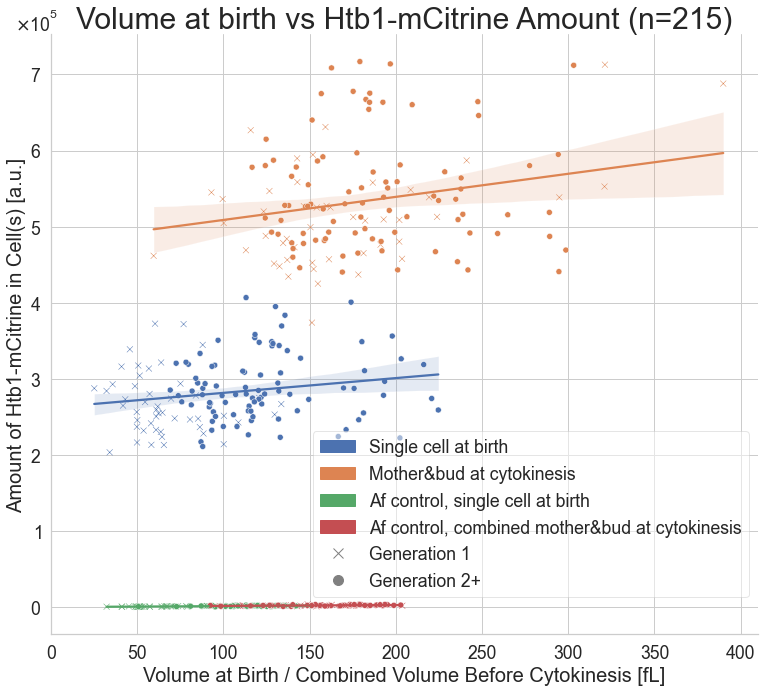

sample size flu-control: 78
sample size tagged strain: 137


In [20]:
#plot_data4b = plot_data4b[plot_data4b.selection_subset==1]
sns.set_theme(style="whitegrid", font_scale=1.6)
# Initialize the figure
sns.lmplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b.sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    #style="generation_num",
    #row="selection_subset",
    #sharex=False,
    height=10,
    aspect=1.1,
    scatter=False
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b[plot_data4b.generation_num==1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='x'
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b[plot_data4b.generation_num>1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='o'
)

#g._legend.set_title('Kind of Measurement')
ax = plt.gca()
#ax.set(yscale="log2")
#ax.set_yscale('log', basey=2)
#ax.set_xscale('log', basex=10)
labels = [
    'Single cell at birth',
    'Mother&bud at cytokinesis',
    'Af control, single cell at birth',
    'Af control, combined mother&bud at cytokinesis',
    'Generation 1',
    'Generation 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette()[0]),
    mpatches.Patch(color=sns.color_palette()[1]),
    mpatches.Patch(color=sns.color_palette()[2]),
    mpatches.Patch(color=sns.color_palette()[3]),
    mlines.Line2D([], [], color='gray', marker='x', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                          markersize=10)
]
ax.legend(
    handles=handles,
    labels=labels, 
    loc='center right',
    bbox_to_anchor = (1,0.2),
    framealpha=0.5
)
ax.set_ylabel("Amount of Htb1-mCitrine in Cell(s) [a.u.]", fontsize=20)
ax.set_xlabel("Volume at Birth / Combined Volume Before Cytokinesis [fL]", fontsize=20)
ax.set_title(f"Volume at birth vs Htb1-mCitrine Amount (n={int(sample_size_4b/2)})", fontsize=30)
# format y-axis
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
ax.get_yaxis().get_offset_text().set_position((-0.05,0))
# format x-axis
ax.set_xlim(0, plot_data4b.relevant_volume.max()+20)
plt.tight_layout()
"""
plt.savefig(
    os.path.join('..', 'figures', 'mCitrine_at_birth_and_cytokinesis_v5.pdf'),
    dpi=300
)
"""
plt.show()
print(f'sample size flu-control: {len(plot_data4b[plot_data4b.selection_subset==1])//2}')
print(f'sample size tagged strain: {len(plot_data4b[plot_data4b.selection_subset==0])//2}')

## Perform calculations for Figure 4C: Filter for cells at birth (first frame into G1 of each mother cell)

In [21]:
# will show up at x=1 --> later mother cells at their own birth
mothers_at_birth = overall_df_with_rel[
    (overall_df_with_rel.generation_num==1) & 
    (overall_df_with_rel.cell_cycle_stage=='G1') & 
    (overall_df_with_rel.frame_i==overall_df_with_rel.phase_begin) & 
    (overall_df_with_rel.is_history_known) &
    (overall_df_with_rel.file=='MIA_KC_htb1_mCitrine_labeled') &
    (~overall_df_with_rel.is_cell_excluded)
]
# will show up at x>1 --> mother cells now dividing from their own daughter cell the first (gen=2), second (gen=3),... time
mothers_at_division = overall_df_with_rel[
    (overall_df_with_rel.generation_num>1) & 
    (overall_df_with_rel.cell_cycle_stage=='G1') & 
    (overall_df_with_rel.frame_i==overall_df_with_rel.division_frame_i) & 
    (overall_df_with_rel.is_history_known) &
    (overall_df_with_rel.file=='MIA_KC_htb1_mCitrine_labeled') &
    (~overall_df_with_rel.is_cell_excluded)
]

In [22]:
mothers_df = pd.concat([mothers_at_division,mothers_at_birth], ignore_index=True)
mothers_df['pos_cell_id'] = mothers_df.apply(lambda x: f'cell_{x.loc["Cell_ID"]}_{x.loc["position"]}', axis=1)
# calculate number of cells per generation
gen_counter = Counter(mothers_df.generation_num)
mothers_df['x_label'] = mothers_df.generation_num.apply(lambda x: f'{int(x)} (n={gen_counter[x]})')
mothers_df = mothers_df[['frame_i', 'Cell_ID', 'file', 'position', 'x_label', 'mCitrine_corrected_amount', 'mCitrine_corrected_concentration']].sort_values('x_label')
#mothers_df.to_csv(os.path.join(data_dir, 'plot_data4c.csv'), index=False)

## Generate Figure 4C

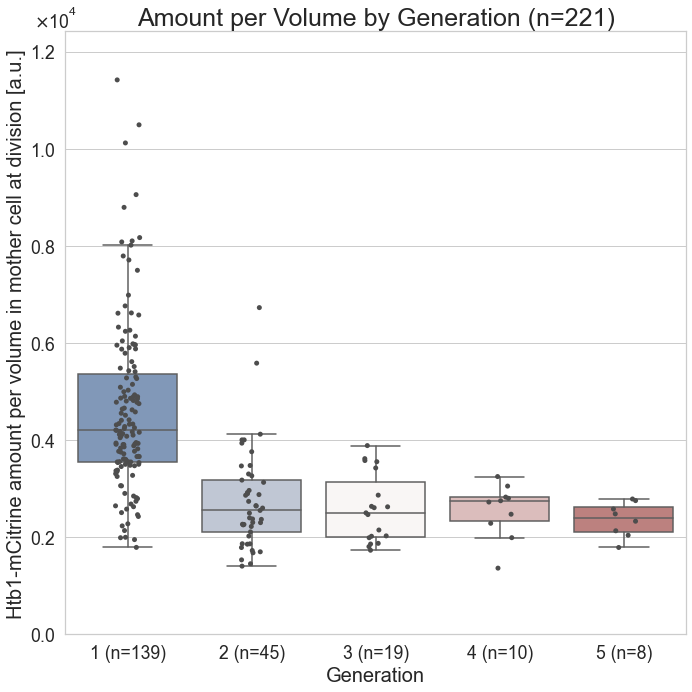

In [23]:
sns.set_theme(style="whitegrid", font_scale=1.6)
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(
    data=mothers_df,
    x='x_label',
    y='mCitrine_corrected_concentration',
    palette='vlag',
    fliersize=0,
    ax=ax
)

#add stripplot on top
sns.stripplot(
    data=mothers_df,
    x='x_label',
    y='mCitrine_corrected_concentration',
    color=".3",
    ax=ax
)

# switch to scientific number format on y-Axis and move text
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
ax.get_yaxis().get_offset_text().set_position((-0.05,0))

# Rename axes and set title
ax.set_ylabel("Htb1-mCitrine amount per volume in mother cell at division [a.u.]", fontsize=20)
ax.set_xlabel("Generation", fontsize=20)
ax.set_title(f"Amount per Volume by Generation (n={len(mothers_df)})", fontsize=25) # changed this from 30 to 25 compared to 4B
ax.set_ylim(0, mothers_df.mCitrine_corrected_concentration.max()+0.1e4)

# save and show
plt.tight_layout()
#plt.savefig('../figures/generation_plot_v5.svg')#, dpi=300)
#plt.savefig('../figures/generation_plot_v5.png', dpi=300)
plt.show()

### Identify outliers and perform quick inspection to exclude possibility of Segmentation errors

Cell_ID                               13
frame_i                              125
file        MIA_KC_htb1_mCitrine_labeled
position                      Position_8
Name: 195, dtype: object


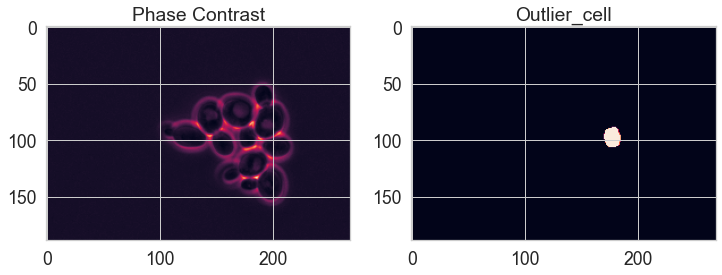

Cell_ID                               30
frame_i                              214
file        MIA_KC_htb1_mCitrine_labeled
position                      Position_8
Name: 210, dtype: object


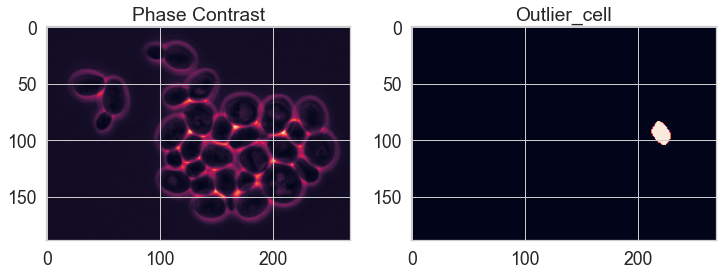

Cell_ID                               50
frame_i                              237
file        MIA_KC_htb1_mCitrine_labeled
position                      Position_5
Name: 184, dtype: object


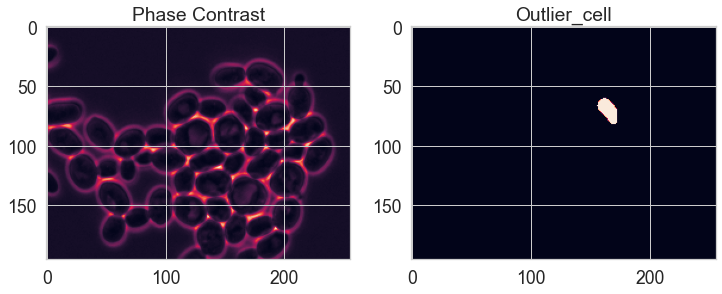

In [24]:
outliers = mothers_df.loc[mothers_df['mCitrine_corrected_concentration'] > 1e4][['Cell_ID', 'frame_i', 'file', 'position']]
data_path = f'../data/acdc_test_data/TimeLapse_2D/MIA_KC_htb1_mCitrine_labeled'
for idx, line in outliers.iterrows():
    print(line)# if 'is' in str(v)])
    pos_dir = f'{data_path}/{line["position"]}/Images'
    channel_data, seg_mask, cc_data, metadata, cc_props = cca_functions._load_files(pos_dir, ['phase_contr'])
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title('Phase Contrast')
    plt.imshow(channel_data[line["frame_i"]])
    plt.subplot(122)
    plt.title('Outlier_cell')
    plt.imshow(seg_mask[line["frame_i"]]==line["Cell_ID"])
    plt.show()